<center> <img src='https://www.cm-santarem.pt/images/santarem/covid19/ARECOVID.jpg' width="950" height="250"> </center>

# Deep Learning Project <img align='right' width='120' height='130' src='https://maiseducativa.com/wp-content/uploads/2015/02/Logo_Nova-IMS.jpg'>
<p>
<p>    
    

## <font color='SeaGreen'>__Preprocessing__</font><br>

>> __João Malho, nº20220696__ , m20220696@novaims.unl.pt<p>

***
    
### 💾 Data 

All jupyter notebooks must be in the same folder with this data downloaded.
It's a directory structure __branched into test and train and further branched into the respective 3 classes__ which contains the Chest X-rays images.

__Source:__ https://www.kaggle.com/datasets/pranavraikokte/covid19-image-dataset
    
## <center> __Lung Virus Detection__ </center>

__Reminding from Exploration:__

> * We have a dataset with a collection of chest X-ray images that need to be classified into three categories: COVID-19, pneumonia, and normal lungs.<br>
> * Images vary in contrast, positioning and noise, making it challenging for neural networks to categorize them accurately.<br>
> * We have an uneven distribution of X-ray images by class,  with a predominance of COVID-19. This could lead to the model favouring this class, which would reduce accuracy.<br>

***
## 📋 Index <a class="anchor"><a id='index'></a>
> ## [<font color='MediumPurple'> __1. Data Collection__</font>](#one)
>> ### [<font color='White'> __1.1 Image Size__</font>](#oneone)
>> ### [<font color='White'> __1.2 Get x_train and x_test__</font>](#onetwo)
> ## [<font color='MediumPurple'> __2. Image Preprocessing & Data Augmentation__ </font>](#two)
>> ### [<font color='White'> __2.1 ImageDataGenerator__ </font>](#twoone)
>> ### [<font color='White'> __2.2 Pre processing__ </font>](#twotwo)
>> ### [<font color='White'> __2.3 Creating Validation Set__ </font>](#twothree)
>> ### [<font color='White'> __2.4 Get Labels__ </font>](#twofour)
>> ### [<font color='White'> __2.5 Check images changed__ </font>](#twofive)
>> #### [<font color='White'> __2.5.1 Train data augmented__ </font>](#twofiveone)
>> #### [<font color='White'> __2.5.2 Test data augmented__ </font>](#twofivetwo)
> ## [<font color='MediumPurple'> __3. Oversampling__ </font>](#three)
***
***

***
## <font color='white'> __1. Data Collection__ </font> <a class="anchor" id="one"></a>

[<font color='mediumpurple'>Back to Index </font>](#index)

### <font color='white'> __1.1 Image Size__ </font> <a class="anchor" id="oneone"></a>

[<font color='mediumpurple'>Back to Index </font>](#index)


In [18]:
import os
import random
import numpy as np
from PIL import Image , ImageFile
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

ImageFile.LOAD_TRUNCATED_IMAGES = True

In [19]:
image_size = (224,224)

__Notes:__

* In order to use the __*Visual Geometry Group (VGG)*__ neural network architecture, the images need to be resized to __224x224 pixels__. This is because *VGG* was originally trained on the *ImageNet* dataset, which contained photos of this size. 

* We may use the pre-trained weights of the *VGG* network and apply transfer learning to our own dataset by resizing the photos to 224x224

* This dont have any impact on __CNN__ architecture once this one can train with images between 64x64 and 256x256
 
__Source:__ https://viso.ai/deep-learning/vgg-very-deep-convolutional-networks/

### <font color='white'> __1.2 Get x_train and x_test__ </font> <a class="anchor" id="onetwo"></a>

[<font color='mediumpurple'>Back to Index </font>](#index)


In [20]:
# Dataset folder
folder_path = os.path.join(os.getcwd(), r'Covid19-dataset')

train_path = folder_path + r'/train'
test_path = folder_path + r'/test'

# x_train and y_train alreayd have size image adjustment 
x_train = []
for folder in os.listdir(train_path):
    sub_path = train_path + '/' + folder
    for image in os.listdir(sub_path):
        img_path = sub_path + '/' + image
        img = Image.open(img_path)              # Open Image 
        img = img.resize(image_size)            # Resize Image as explained above
        x_train.append(np.array(img))
        
x_test = []
for folder in os.listdir(test_path):
    sub_test = test_path + '/' + folder
    for image in os.listdir(sub_test):
        img_test = sub_test + '/' + image
        imgtest = Image.open(img_test)
        imgtest = imgtest.resize(image_size)
        x_test.append(np.array(imgtest))

***
## <font color='white'> __2. Image Preprocessing & Data Augmentation__ </font> <a class="anchor" id="two"></a>

[<font color='mediumpurple'>Back to Index </font>](#index)

### <font color='white'> __2.1 ImageDataGenerator:__ </font> <a class="anchor" id="twoone"></a>

[<font color='mediumpurple'>Back to Index </font>](#index)

* Generates new images from existing ones with real-time data augmentation. It's used to __take the inputs of the original data and then transform it according to the paramenter given__, returning the output with changed data.

<center> <img src='https://pyimagesearch.com/wp-content/uploads/2019/07/keras_data_augmentation_header.png' width="950" height="550"> </center>

__Source:__ https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

### <font color='white'> __2.2 Pre processing__ </font> <a class="anchor" id="twotwo"></a>

[<font color='mediumpurple'>Back to Index </font>](#index)

__Source:__ https://towardsdatascience.com/image-data-augmentation-for-deep-learning-77a87fabd2bf

In [27]:
# Data Augmentation
train_gen = ImageDataGenerator(
    
                            # image rotation
                            rotation_range=45,
    
                            # image shifters
                            width_shift_range=0.2, 
                            height_shift_range=0.2,
                            channel_shift_range=100,

                            # image zoomers & distorters
                            shear_range=0.5,       
                            zoom_range=0.5,   
                    
                            # image flippers
                            horizontal_flip=True,
                            vertical_flip=True,
                            
                            # fills missing pixels  
                            # nearest fills the missing with the value
                            # of nearest pixel
                            fill_mode='nearest',
    
                            # rescales to [0,1]
                            rescale = 1./255, 
                            
                            # getting validation split
                            validation_split=.2
                            )
# Rescaling test data
test_gen = ImageDataGenerator(rescale = 1./255)

__Notes:__

* Here RGB color is normalized into a range between 0 and 1, once the max value is 255.

* Additionally we are subsetting 20% of train_data into validation_data.  

__Source:__ https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

* __flow_from_directory__ is a keras function that allows you to read the images directly from a directory and augment them while the neural network model is learning.

__Source:__ https://github.com/keras-team/keras/blob/v2.12.0/keras/preprocessing/image.py#L1562-L1667

### <font color='white'> __2.3 Creating Validation Set__ </font> <a class="anchor" id="twothree"></a>

[<font color='mediumpurple'>Back to Index </font>](#index)


In [28]:
train = train_gen.flow_from_directory(
                    train_path,
                    subset = 'training',
                    batch_size=32, # Default value
                    target_size=image_size,
    
                    # Used for multi-class classification problems where 
                    # there are more than two classes. The labels are 
                    # returned as a 1D numpy array of integer labels
                    class_mode = 'sparse' 
)

val = train_gen.flow_from_directory(
                    train_path,
                    subset = 'validation',
                    batch_size=32, 
                    target_size=image_size,
                    class_mode = 'sparse'
)

test = test_gen.flow_from_directory(
                    test_path,
                    batch_size=32,
                    target_size=image_size,
                    class_mode = 'sparse'
)

Found 267 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


__Notes:__

* To assess the model's performance on untried data and avoid overfitting during training, the validation set is developed. In our project, we use a subset of the training data as the validation set. As a result, we may adjust the model's hyperparameters and track the training process without affecting the test set, which is only used for the model's final evaluation. By using a validation set, we can make better decisions regarding the model's architecture and avoid overfitting to the training data.
* The data was splited into 3 sets, train, validation, test and each one was processed. Will be modeling in the first phase with a 32 batch size, although this parameter will be tested further.

### <font color='white'> __2.4 Get Labels__ </font> <a class="anchor" id="twofour"></a>

[<font color='mediumpurple'>Back to Index </font>](#index)

In [29]:
y_train = train.classes 
y_val = val.classes
y_test = test.classes 
print(train.class_indices)

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}


### <font color='white'> __2.5 Check images changed__ </font> <a class="anchor" id="twofive"></a>

[<font color='mediumpurple'>Back to Index </font>](#index)

In [30]:
# Function to plot the images from gen augmentation
def plot_gen(data_gen):
    # Get a batch of images and labels
    batch_images, batch_labels = next(data_gen)

    # Get class names
    class_names = list(data_gen.class_indices.keys())

    # Plot the images
    fig, axs = plt.subplots(3, 3, figsize=(10, 10))
    axs = axs.flatten()
    for i in range(len(batch_images)):
        axs[i].imshow(batch_images[i])
        axs[i].axis('off')
        class_idx = int(batch_labels[i])
        class_name = class_names[class_idx]
        axs[i].set_title(f"Label: {class_name}")
    
    plt.show()

#### <font color='white'> __2.5.1 Train data augmented__ </font> <a class="anchor" id="twofiveone"></a>

[<font color='mediumpurple'>Back to Index </font>](#index)

IndexError: index 9 is out of bounds for axis 0 with size 9

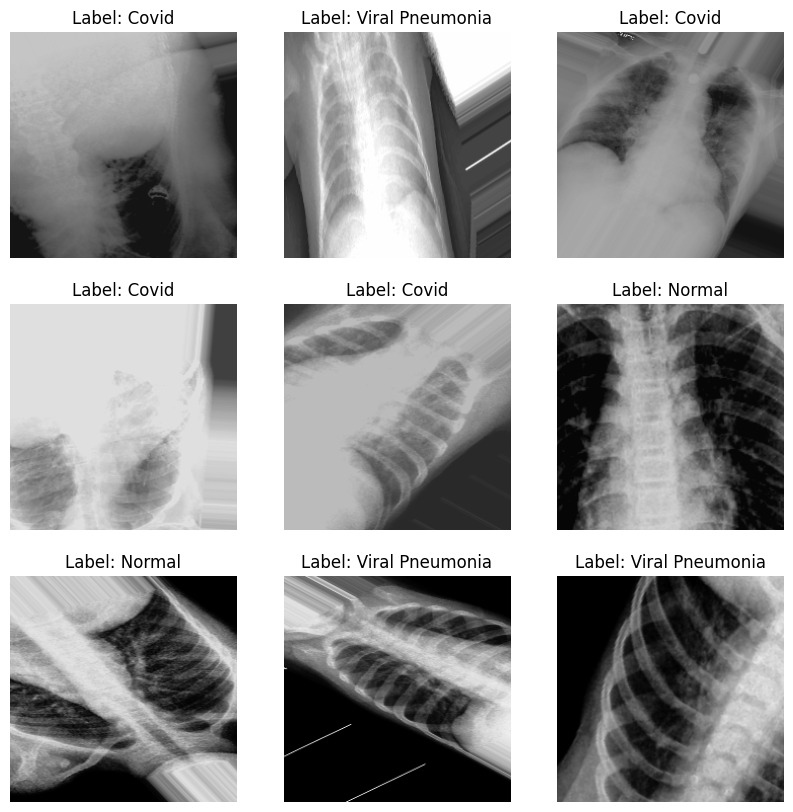

In [31]:
plot_gen(train)

#### <font color='white'> __2.5.2 Test data augmented__ </font> <a class="anchor" id="twofivetwo"></a>

[<font color='mediumpurple'>Back to Index </font>](#index)

IndexError: index 9 is out of bounds for axis 0 with size 9

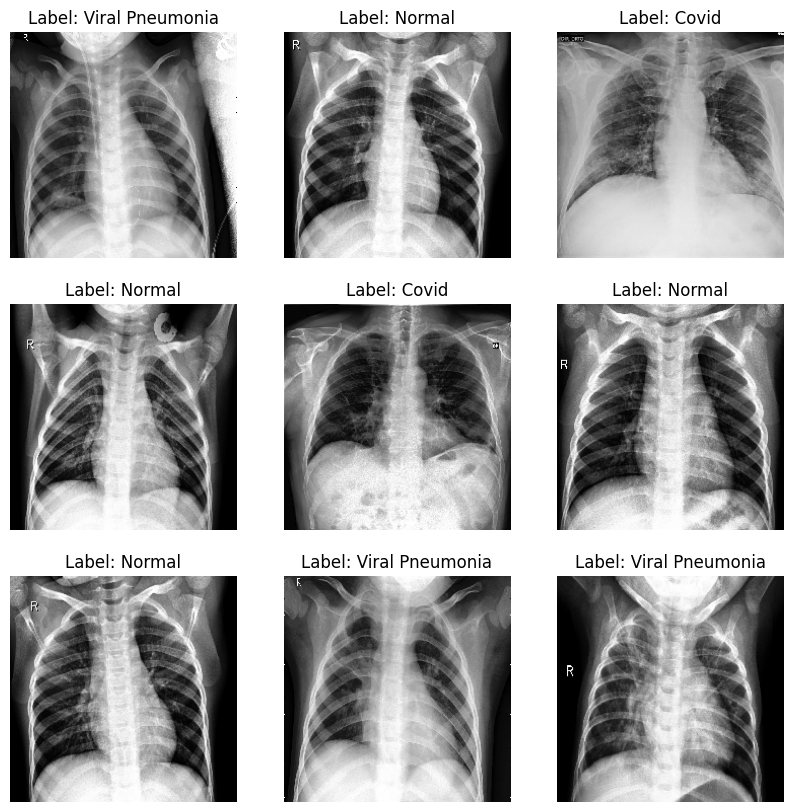

In [32]:
plot_gen(test) 

***

## <font color='white'> __3. Oversampling__ </font> <a class="anchor" id="three"></a>

[<font color='mediumpurple'>Back to Index </font>](#index)

In [33]:
covid_path = folder_path + r'/train/Covid'
normal_path = folder_path + r'/train/Normal'
viral_path = folder_path + r'/train/Viral Pneumonia'

# Determine the number of images in each class
n_covid = len(os.listdir(covid_path))
n_viral = len(os.listdir(viral_path))
n_normal = len(os.listdir(normal_path))

# Calculate the target number of images in each class
target_n = max(n_covid, n_viral, n_normal)

# Function to augment images
def augment_images(directory, num_to_generate, datagen):
    img_names = os.listdir(directory)
    i = 0
    while i < num_to_generate:
        img_name = random.choice(img_names) 
        img_path = os.path.join(directory, img_name)
        img = load_img(img_path)
        x = img_to_array(img)
        x = np.expand_dims(x, axis=0)
        batch = datagen.flow(x, 
                            batch_size=1, 
                            save_to_dir=directory, 
                            save_prefix='aug_', 
                            save_format='png')
        _ = next(batch)
        i += 1

# Oversampling
augment_images(covid_path, target_n - n_covid, train_gen)
augment_images(viral_path, target_n - n_viral, train_gen)
augment_images(normal_path, target_n - n_normal, train_gen)

__Notes:__

__Oversampling__ 
* Duplicating samples from the minority class

* To solve the problem of unbalanced data we decide to use the oversampling technique.

__Source:__ https://towardsdatascience.com/oversampling-and-undersampling-5e2bbaf56dcf

In [34]:
# create label distribution of training data for further investigation
label_dist = {}
for img_class in os.listdir(folder_path + '/train'):
    counter = 0 
    for img in os.listdir(folder_path + '/train/' +  img_class):
        counter += 1 
    label_dist[img_class] = counter

inverse_class_weights = [1 / (count / sum(label_dist.values())) for count in label_dist.values()]

fig = go.Figure(data=[go.Pie(labels=np.asarray([k for k in label_dist.keys()]),
                            values=np.asarray([v for v in label_dist.values()]),
                            hole=.5,
                            textinfo='label+percent',
                            insidetextorientation='radial',
                            textposition='outside',
                            marker=dict(colors=["#9E0142", "#D53E4F", "#F46D43"])
                            )])

fig.update_layout(title='<b>Train Set Class Balance</b>',
                title_x=0.5 ,
                title_y=0.95,
                font_size = 14,
                width = 900,
                height = 500,
                template = 'plotly_dark')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hole': 0.5,
              'insidetextorientation': 'radial',
              'labels': array(['Covid', 'Normal', 'Viral Pneumonia'], dtype=object),
              'marker': {'colors': ['#9E0142', '#D53E4F', '#F46D43']},
              'textinfo': 'label+percent',
              'textposition': 'outside',
              'type': 'pie',
              'values': array([111, 111, 111])}],
    'layout': {'font': {'size': 14},
               'height': 500,
               'template': '...',
               'title': {'text': '<b>Train Set Class Balance</b>', 'x': 0.5, 'y': 0.95},
               'width': 900}
})

__Notes:__

* With the dataset now balanced, each class has an equal number of samples, ensuring that no class dominates the model's predictions, thus improving the model's performance.